### This is Assignment1 Part2 for EE214 Machine Learning Basics and Practices.
Euiseok Han, 20200690\
Date: 040925

I utilized the given skeleton code.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('Concrete_Data.xls')
print(data.head())

# Preprocess the data
X = data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1).values
X_cement = data['Cement'].values
X_blast_furnace_slag = data['Blast Furnace Slag'].values
X_fly_ash = data['Fly Ash'].values
X_water = data['Water'].values
X_superplasticizer = data['Superplasticizer'].values
X_coarse_aggregate = data['Coarse Aggregate'].values
X_fine_aggregate = data['Fine Aggregate'].values
X_age = data['Age'].values
y = data['Concrete compressive strength(MPa, megapascals) '].values # Concrete compressive strength becomes our target value

# ----- Standardize features -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Split the data -----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 0)


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  \
0            1040.0           676.0   28   
1            1055.0           676.0   28   
2             932.0           594.0  270   
3             932.0           594.0  365   
4             978.4           825.5  360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075  


In [6]:
# (a) Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
degrees = [i for i in range(10)]
poly_train_errors = []
poly_test_errors = []

for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    # plt.figure()
    # plt.scatter(X_scaled[:, 0].T, y.T, color='b', edgecolor='k', label='label : 1', s=20)
    # plt.scatter(X_test[:, 0].T, y_test_pred.T, color='r', edgecolor='k', label='label : 1', s=20)
    # plt.grid(True)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    print(test_mse)

265.384492976117
95.63533482690983
62.27694218548945
51.11477193069301
8813.656885375
875857622.3156652
5754527291.977926
1123142475.8076804
609456717.9814155
8513868999.921293


In [7]:
# (b) Gaussian Basis Regression
def create_gaussian_design_matrix(x, degree, sigma=1.0):
    """
    Create a design matrix using Gaussian basis functions.
    Args:
        x : numpy array of shape (n_samples,)
        degree : number of Gaussian basis functions
        sigma : width of the Gaussian functions
    Returns:
        X : design matrix with shape (n_samples, degree + 1) including bias term
    """
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree + 1))
    
    # ----- Fill in Gaussian basis transformation -----
    # TODO: Fill in the loop to compute Gaussian basis functions
    for j in range(1, degree + 1):
        mu = j / (degree + 1)
        X[:, j] = np.exp(-0.5 * ((x - mu) ** 2) / sigma**2)
    
    return X

# For simplicity, use one feature (the first column) from the training set
x_train_feature = X_train[:, 0]
x_test_feature = X_test[:, 0]

gaussian_degrees = [i for i in range(100)]
gauss_train_errors = []
gauss_test_errors = []

for degree in gaussian_degrees:
    X_train_gauss = create_gaussian_design_matrix(x_train_feature, degree, sigma=1.0)
    X_test_gauss = create_gaussian_design_matrix(x_test_feature, degree, sigma=1.0)

    # --- Fit Gaussian basis regression model and evaluate performance ---
    # TODO:
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_gauss = LinearRegression()
    model_gauss.fit(X_train_gauss, y_train)
    y_train_pred = model_gauss.predict(X_train_gauss)
    y_test_pred = model_gauss.predict(X_test_gauss)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    gauss_train_errors.append(train_mse)
    gauss_test_errors.append(test_mse)
    print(test_mse)


265.384492976117
251.51060401877635
200.36467060499027
195.46856608024183
180.9636823777833
179.83697366373116
180.13000849667296
179.6671738641826
182.19698200664354
182.72073239283083
182.62976425622998
182.63172239406293
182.63172061462993
182.63282561616882
182.63325475745586
182.63313209388286
182.63357223660972
182.63406635758616
182.63413697400378
182.6339895303141
182.63445887476036
182.63470130861808
182.6347166583422
182.6347488272905
182.63502007208663
182.63519550270527
182.63517196145784
182.63530830596525
182.63542398796588
182.6353668573758
182.63558925933577
182.63552251328514
182.63560970215792
182.63564814302129
182.6356324720909
182.6356721343797
182.63577359532258
182.63577546420495
182.63587104552474
182.6358172682891
182.63587548777784
182.63593767035857
182.6359186919278
182.6359664449228
182.63600146065033
182.6359974313722
182.63602403981017
182.63607058276165
182.63610010495117
182.63616025076567
182.63610389099165
182.63610336991454
182.63616165434482
182.636

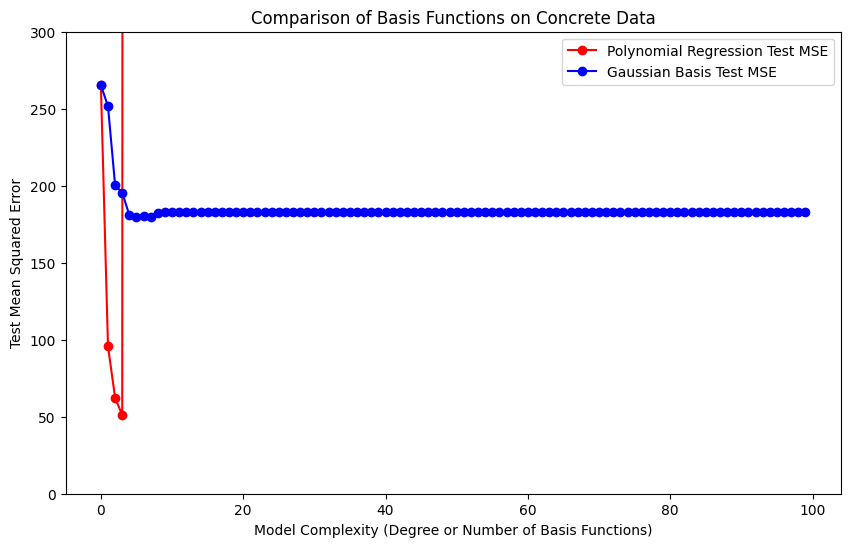

In [8]:
# Plot comparison of test errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, poly_test_errors, 'ro-', label='Polynomial Regression Test MSE')
plt.plot(gaussian_degrees, gauss_test_errors, 'bo-', label='Gaussian Basis Test MSE')
plt.xlabel('Model Complexity (Degree or Number of Basis Functions)')
plt.ylabel('Test Mean Squared Error')
plt.ylim(0, 300)
plt.title('Comparison of Basis Functions on Concrete Data')
plt.legend()
plt.show()



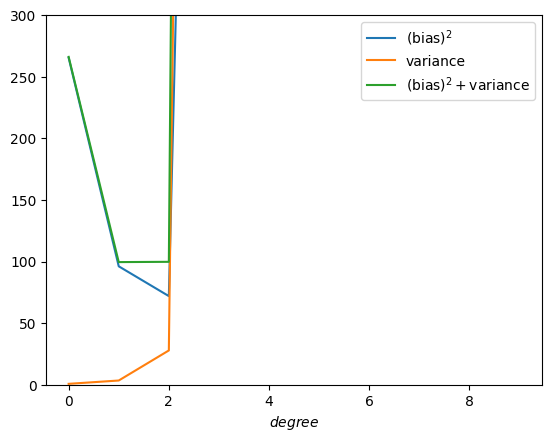

[2.66104740e+02 9.95329681e+01 9.97575802e+01 4.93297028e+03
 2.47659160e+06 2.49688092e+06 1.03308747e+07 5.12846584e+07
 2.56711581e+08 1.45069503e+09]


In [9]:
# (c) Polynomial Regression - Bias-Variance
# X_train has 1030 * 0.8 = 824 samples
# 824 has 1, 2, 4, 206, 412, 824 as a divisor
# So here, we will divide X_train into four sets and do training to observe
# properties of bias and variance
from numpy.linalg import norm

sample_size = 206
n_models = 4
np.random.seed(690)

indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffle = X_train[indices]
y_train_shuffle = y_train[indices]

degrees = [i for i in range(10)]
bias = []
variance = []

for degree in degrees:
    avg_y = np.zeros(sample_size)
    models = []
    for i in range(n_models):
        X_train_tmp = X_train_shuffle[i*sample_size:(i+1)*sample_size]
        y_train_tmp = y_train_shuffle[i*sample_size:(i+1)*sample_size]
        # ----- Blank : Transform features into polynomial features -----
        # Create a PolynomialFeatures object with the given degree (include bias term)
        # Transform both the training and test data

        # TODO : Fill in the code below
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train_tmp)
        X_test_poly = poly.fit_transform(X_test)
    
        # ----- Blank : Fit linear regression model and evaluate performance -----
        # TODO :
        # - Initialize and train LinearRegression model
        # - Predict on both training and test sets
        # - Compute train and test MSE
        # - Append errors to respective lists

        model_poly = LinearRegression()
        model_poly.fit(X_train_poly, y_train_tmp)
        y_train_pred = model_poly.predict(X_train_poly)
        y_test_pred = model_poly.predict(X_test_poly)
        avg_y = avg_y + y_test_pred
        models.append(y_test_pred)
    
    avg_y = avg_y / n_models

    bias_val = norm(avg_y - y_test) ** 2 / len(y_test)
    bias.append(bias_val)

    var_val = 0
    for y_test_pred in models:
        var_val = var_val + (norm(avg_y - y_test_pred) ** 2 / len(y_test))
    variance.append(var_val / n_models)

plt.plot(degrees, bias, label='(bias)$^{2}$')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, np.array(bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$degree$')
plt.ylim(0, 300)
plt.legend()
plt.show()
print(np.array(bias) + np.array(variance))

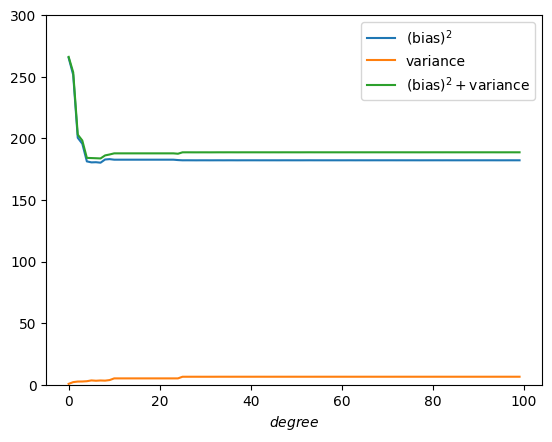

[266.10473965 253.60127553 202.99833074 198.21703864 184.11258058
 183.97855196 183.83212859 183.66209201 186.1231692  186.88606588
 187.79930642 187.79902785 187.79880852 187.79870463 187.79855257
 187.7984082  187.79828792 187.79804273 187.79788785 187.79790692
 187.79798205 187.79776886 187.79778933 187.7976387  187.48863492
 188.63111805 188.64319245 188.63173546 188.6175085  188.63032418
 188.63157943 188.61669395 188.63258539 188.65220407 188.64085948
 188.6562208  188.64979132 188.63561232 188.64712242 188.65087874
 188.6493371  188.6506257  188.64280204 188.64602094 188.64047715
 188.64822119 188.64115236 188.65046875 188.65613232 188.64635334
 188.64417156 188.64053883 188.65257244 188.66414592 188.64797019
 188.6519001  188.64667752 188.64847221 188.64836468 188.64650088
 188.64647338 188.64689331 188.65484934 188.64086828 188.65204514
 188.64585786 188.65121653 188.65517006 188.65291854 188.65262154
 188.65366663 188.65384508 188.6493958  188.65169524 188.64547227
 188.65055

In [10]:
# (d) Gaussian Basis Regression - Bias-Variance
# X_train has 1030 * 0.8 = 824 samples
# 824 has 1, 2, 4, 206, 412, 824 as a divisor
# So here, we will divide X_train into four sets and do training to observe
# properties of bias and variance
from numpy.linalg import norm

sample_size = 206
n_models = 4
np.random.seed(690)

indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffle = X_train[indices]
y_train_shuffle = y_train[indices]

X_train_feature_shuffle = X_train_shuffle[:, 0]
X_test_feature = X_test[:, 0]

degrees = [i for i in range(100)]
bias = []
variance = []

for degree in degrees:
    avg_y = np.zeros(sample_size)
    models = []
    X_test_gauss = create_gaussian_design_matrix(x_test_feature, degree, sigma=1.0)
    for i in range(n_models):
        x_train_feature_tmp = X_train_feature_shuffle[i*sample_size:(i+1)*sample_size]
        X_train_gauss_tmp = create_gaussian_design_matrix(x_train_feature_tmp, degree, sigma=1.0)
        y_train_tmp = y_train_shuffle[i*sample_size:(i+1)*sample_size]
        # --- Fit Gaussian basis regression model and evaluate performance ---
        # TODO:
        # - Initialize and train LinearRegression model
        # - Predict on both training and test sets
        # - Compute train and test MSE
        # - Append errors to respective lists
        
        model_gauss = LinearRegression()
        model_gauss.fit(X_train_gauss_tmp, y_train_tmp)
        y_train_pred = model_gauss.predict(X_train_gauss_tmp)
        y_test_pred = model_gauss.predict(X_test_gauss)
        avg_y = avg_y + y_test_pred
        models.append(y_test_pred)
    
    avg_y = avg_y / n_models

    bias_val = norm(avg_y - y_test) ** 2 / len(y_test)
    bias.append(bias_val)

    var_val = 0
    for y_test_pred in models:
        var_val = var_val + (norm(avg_y - y_test_pred) ** 2 / len(y_test))
    variance.append(var_val / n_models)

plt.plot(degrees, bias, label='(bias)$^{2}$')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, np.array(bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$degree$')
plt.ylim(0, 300)
plt.legend()
plt.show()
print(np.array(bias) + np.array(variance))

80.45583162122608


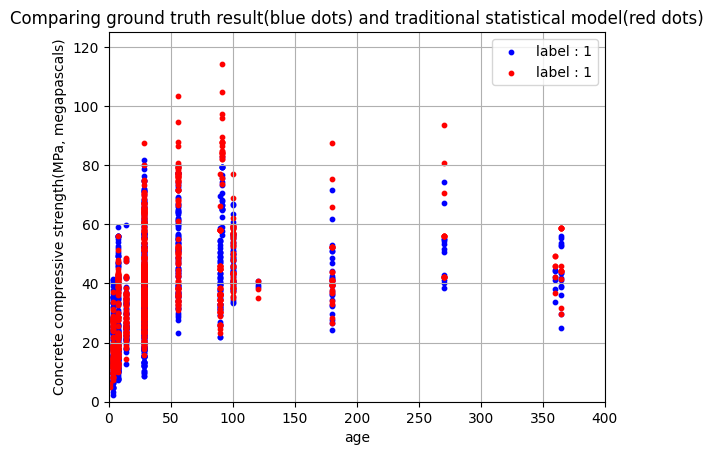

In [11]:
# (e) For real-world applicability analysis
# Baseline predictor based on the original paper:
# "Modeling of strength of high-performance concrete using artificial neural networks"
# I-Cheng Yeh, Cement and Concrete Research, Volume 28, Issue 12, 1998, Pages 1797-1808
# https://doi.org/10.1016/S0008-8846(98)00165-3
X_binder = X_cement + X_fly_ash + X_blast_furnace_slag
X_water_to_binder_ratio = X_water / X_binder
baseline = 13.859 * (X_water_to_binder_ratio ** -1.2749) * (0.2583 * np.log(X_age) + 0.1377)

plt.figure()
plt.scatter(X_age.T, y.T, color='b', edgecolor='b', label='label : 1', s=10)
plt.scatter(X_age.T, baseline.T, color='r', edgecolor='r', label='label : 1', s=10)
plt.xlim(0, 400)
plt.ylim(0, 125)
plt.xlabel('age')
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.title('Comparing ground truth result(blue dots) and traditional statistical model(red dots)')
plt.grid(True)
plt.legend()

baseline_mse = mean_squared_error(y, baseline)
print(baseline_mse)



265.384492976117
272.0940920207244
265.9662454829519
260.2745164824887
254.59435204678414
251.47511807357102
251.5613646273065
253.21647813962346
254.88347732433877
249.75856656181404


265.384492976117
235.72744028554987
204.44094829999983
177.38948694344126
167.780051678232
167.8516317882806
166.6046075363114
167.6565297555856
167.19475998544982
166.12694099176642


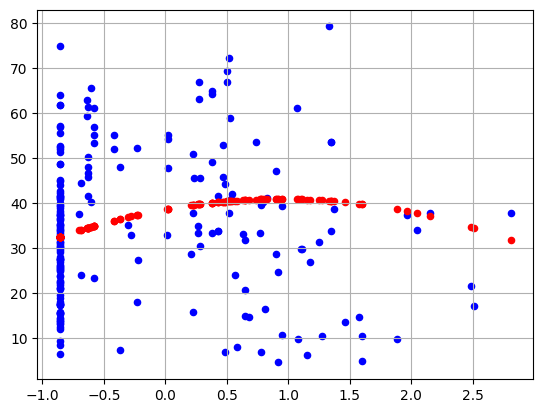

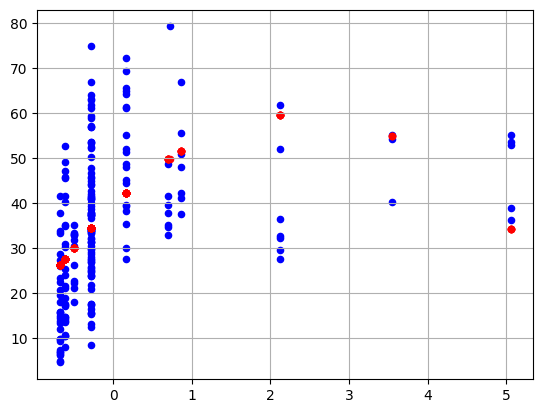

In [ ]:
# (f) Polynomial Regression
degrees = [i for i in range(10)]
poly_train_errors = []
poly_test_errors = []

# X_train_binder = X_train[:, 0] + X_train[:, 1] + X_train[:, 2]
# X_train_water_to_binder_ratio = X_train[:, 3] / X_train_binder
# X_train_water_to_binder_ratio_scaled = scaler.fit_transform(X_train_water_to_binder_ratio.reshape(-1, 1))

# X_test_binder = X_test[:, 0] + X_test[:, 1] + X_test[:, 2]
# X_test_water_to_binder_ratio = X_test[:, 3] / X_test_binder
# X_test_water_to_binder_ratio_scaled = scaler.fit_transform(X_test_water_to_binder_ratio.reshape(-1, 1))


# for degree in degrees:
#     # ----- Blank : Transform features into polynomial features -----
#     # Create a PolynomialFeatures object with the given degree (include bias term)
#     # Transform both the training and test data

#     # TODO : Fill in the code below
#     poly = PolynomialFeatures(degree)
#     X_train_poly = poly.fit_transform(X_train_water_to_binder_ratio_scaled.reshape(-1, 1))
#     X_test_poly = poly.fit_transform(X_test_water_to_binder_ratio_scaled.reshape(-1, 1))
    
#     # ----- Blank : Fit linear regression model and evaluate performance -----
#     # TODO :
#     # - Initialize and train LinearRegression model
#     # - Predict on both training and test sets
#     # - Compute train and test MSE
#     # - Append errors to respective lists

#     model_poly = LinearRegression()
#     model_poly.fit(X_train_poly, y_train)
#     y_train_pred = model_poly.predict(X_train_poly)
#     y_test_pred = model_poly.predict(X_test_poly)
#     train_mse = mean_squared_error(y_train, y_train_pred)
#     test_mse = mean_squared_error(y_test, y_test_pred)
#     poly_train_errors.append(train_mse)
#     poly_test_errors.append(test_mse)
#     print(test_mse)
#     if(degree == 2):
#         plt.figure()
#         plt.scatter(X_test_water_to_binder_ratio_scaled.T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
#         plt.scatter(X_test_water_to_binder_ratio_scaled.T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
#         plt.grid(True)
#         # plt.xlim(0, 5)
#         # plt.ylim(0, 100)

for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[:, 1].reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test[:, 1].reshape(-1, 1))
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    print(test_mse)
    if(degree == 2):
        plt.figure()
        plt.scatter(X_test[:, 1].T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
        plt.scatter(X_test[:, 1].T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
        plt.grid(True)

print('\n')
for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[:, 7].reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test[:, 7].reshape(-1, 1))
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    print(test_mse)
    if(degree == 2):
        plt.figure()
        plt.scatter(X_test[:, 7].T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
        plt.scatter(X_test[:, 7].T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
        plt.grid(True)